In [1]:
from SpaCEX.src.SpaCEX_ETC.src.main.SpaCEX_ETC import SpaCEX_ETC

In [2]:
# get data on 10x and sqf
adata = SpaCEX_ETC.get_data(data='sqf', data_type='adata')
adata, key_m, dataset_m = SpaCEX_ETC.data_process(adata)
#key_m, dataset_m = SpaCEX_ETC.get_data(data='sqf', data_type='image')
key_v, dataset_v = SpaCEX_ETC.get_data(data='10x', data_type='image')

In [3]:
# load pretrained SpaCEX
model = SpaCEX_ETC.load_model()
all_gmat_v2m, all_gmat_m2v = SpaCEX_ETC.data_filter(key_v, dataset_v, key_m, dataset_m)

In [4]:
Gen, SGEs = SpaCEX_ETC.train_ETC(adata, all_gmat_v2m, all_gmat_m2v, model)

100%|██████████| 100/100 [00:46<00:00,  2.13it/s]


In [5]:
img_gen = SpaCEX_ETC.sqf_gen(Gen, SGEs, adata)

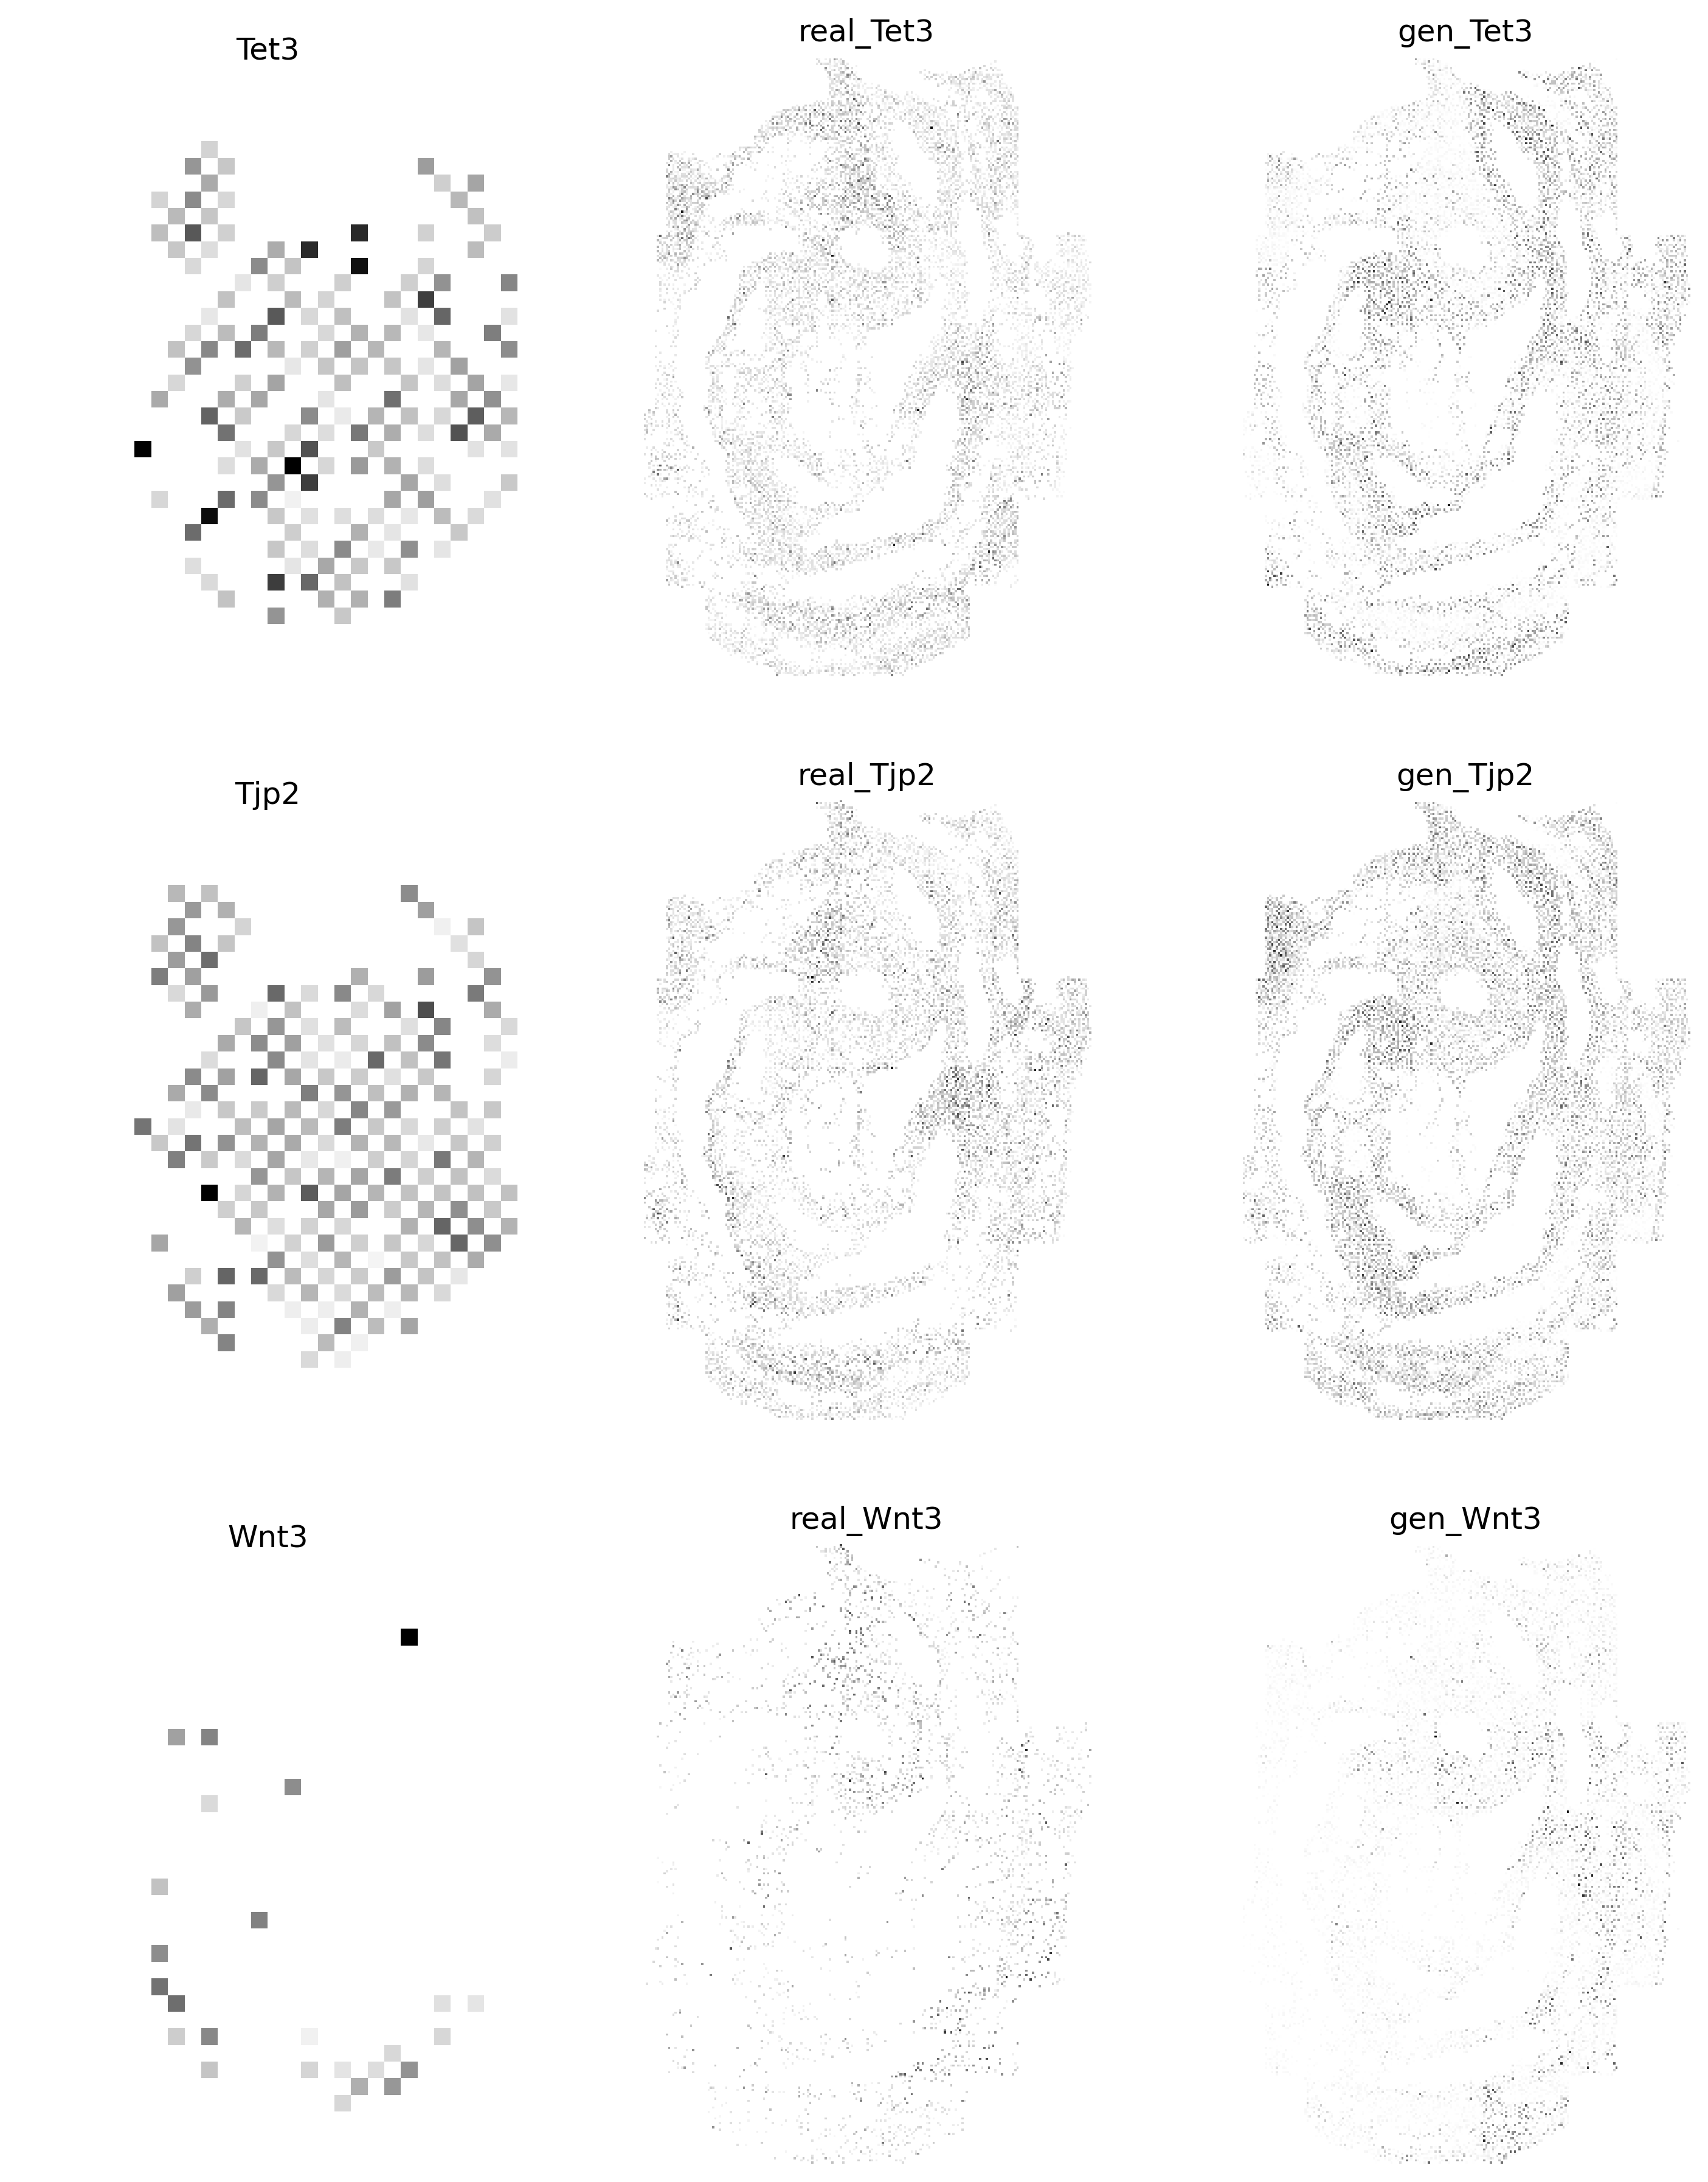

In [6]:
import matplotlib.pyplot as plt
import torch
import numpy as np
fig, axs = plt.subplots(3, 3, figsize = (12,15), dpi=300)
idx=329
key_m = np.array(list(all_gmat_m2v.keys()))
# real visium
img_real = torch.tensor(all_gmat_v2m[key_m[301]])
img_real = img_real.squeeze(0)
img_real = img_real.cpu().detach().numpy()
axs[0, 0].imshow(img_real, cmap='Greys', interpolation='nearest')
axs[0, 0].set_title(key_m[301])
axs[0, 0].axis('off')

# real img
img_real = torch.tensor(all_gmat_m2v[key_m[301]])
img_real = img_real.squeeze(0)
img_real = img_real.cpu().detach().numpy()
axs[0, 1].imshow(img_real, cmap='Greys', interpolation='nearest')
axs[0, 1].set_title('real_{}'.format(key_m[301]))
axs[0, 1].axis('off')

# gen img
img_fake = img_gen[301]
axs[0, 2].imshow(img_fake, cmap='Greys', interpolation='nearest')
axs[0, 2].set_title('gen_{}'.format(key_m[301]))
axs[0, 2].axis('off')

# real visium
img_real = torch.tensor(all_gmat_v2m[key_m[308]])
img_real = img_real.squeeze(0)
img_real = img_real.cpu().detach().numpy()
axs[1, 0].imshow(img_real, cmap='Greys', interpolation='nearest')
axs[1, 0].set_title(key_m[308])
axs[1, 0].axis('off')

# real img
img_real = torch.tensor(all_gmat_m2v[key_m[308]])
img_real = img_real.squeeze(0)
img_real = img_real.cpu().detach().numpy()
axs[1, 1].imshow(img_real, cmap='Greys', interpolation='nearest')
axs[1, 1].set_title('real_{}'.format(key_m[308]))
axs[1, 1].axis('off')

# gen img
img_fake = img_gen[308]
axs[1, 2].imshow(img_fake, cmap='Greys', interpolation='nearest')
axs[1, 2].set_title('gen_{}'.format(key_m[308]))
axs[1, 2].axis('off')

# real visium
img_real = torch.tensor(all_gmat_v2m[key_m[324]])
img_real = img_real.squeeze(0)
img_real = img_real.cpu().detach().numpy()
axs[2, 0].imshow(img_real, cmap='Greys', interpolation='nearest')
axs[2, 0].set_title(key_m[324])
axs[2, 0].axis('off')

# real img
img_real = torch.tensor(all_gmat_m2v[key_m[324]])
img_real = img_real.squeeze(0)
img_real = img_real.cpu().detach().numpy()
axs[2, 1].imshow(img_real, cmap='Greys', interpolation='nearest')
axs[2, 1].set_title('real_{}'.format(key_m[324]))
axs[2, 1].axis('off')

# gen img
img_fake = img_gen[324]
axs[2, 2].imshow(img_fake, cmap='Greys', interpolation='nearest')
axs[2, 2].set_title('gen_{}'.format(key_m[324]))
axs[2, 2].axis('off')

plt.show()